## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df=pd.read_csv('ab_data.csv')
df.head(2)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0


b. Use the cell below to find the number of rows in the dataset.

In [3]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
df_t=df[df['group']=='treatment']
df_treat_old=df_t[df_t['landing_page']=='old_page'].shape[0]
df_c=df[df['group']=='control']
df_cont_new=df_c[df_c['landing_page']=='new_page'].shape[0]
df_treat_old+df_cont_new

3893

f. Do any of the rows have missing values?

In [7]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df_sp1=df_t[df_t['landing_page']=='new_page']
df_sp2=df_c[df_c['landing_page']=='old_page']
df2=pd.concat([df_sp1,df_sp2])

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2.nunique()

user_id         290584
timestamp       290585
group                2
landing_page         2
converted            2
dtype: int64

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2['user_id'].duplicated()==True].user_id

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2['user_id'].duplicated()==True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2 = df2.drop_duplicates(keep = 'first')

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [14]:
df2.converted.mean()

0.11959667567149027

b. Given that an individual was in the `control` group, what is the probability they converted?

In [15]:
p_c=df2[df2['group']=='control'].converted.mean()
p_c

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [16]:
p_t=df2[df2['group']=='treatment'].converted.mean()
p_t

0.11880724790277405

d. What is the probability that an individual received the new page?

In [17]:
df2.landing_page.value_counts()['new_page']/df2.shape[0]

0.5000636646764286

As we see there's statistical evidence that we have higher probabilty to be converted in the control group than treatment group.
But The difference is very small so I do not believe there is a signifcant enough difference for a certain page that will convert more users.

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**Your answer goes here.**


It's almost no difference between the two groups so I do not believe there is no sufficient evidence that will convert more users.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**Put your answer here.** 


Null:   **$p_{old}$** >= **$p_{new}$** 

Alternative :     **$p_{old}$** < **$p_{new}$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [18]:
p_new = df2.converted.mean()
p_new

0.11959667567149027

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [19]:
p_old = df2.converted.mean()
p_old

0.11959667567149027

c. What is $n_{new}$, the number of individuals in the treatment group?

In [20]:
n_new=df2[df2['group']=='treatment'].shape[0]
n_new

145311

d. What is $n_{old}$, the number of individuals in the control group?

In [21]:
n_old=df2[df2['group']=='control'].shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [22]:
new_page_converted = np.random.choice(2, size=n_new ,p=[p_new,1 - p_new])
new_page_converted.mean()

0.88036005532960337

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [23]:
old_page_converted = np.random.choice(2, size=n_old ,p=[p_old,1 - p_old])
new_page_converted.mean()

0.88036005532960337

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [24]:
new_page_converted.mean() - old_page_converted.mean()

0.00020255983832484503

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [25]:
p_new_means , p_old_means , p_diffs=[],[],[]
for _ in range(10000):
    old_page_converted = np.random.choice(2, size=n_old ,p=[p_old,1 - p_old])
    new_page_converted = np.random.choice(2, size=n_new ,p=[p_new,1 - p_new])
    p_old_means.append(old_page_converted.mean())
    p_new_means.append(new_page_converted.mean())
    p_diffs.append(new_page_converted.mean() - old_page_converted.mean())

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

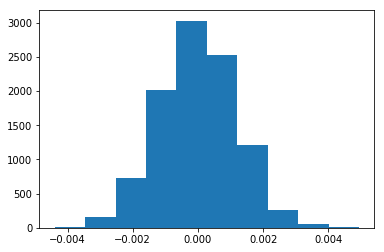

In [26]:
p_diffs=np.array(p_diffs)
plt.hist(p_diffs);

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [27]:
actual_new_page_converted=df2[df2['landing_page']=='new_page']['converted'].mean()
actual_old_page_converted=df2[df2['landing_page']=='old_page']['converted'].mean()
actual_diff=actual_new_page_converted-actual_old_page_converted
(p_diffs>actual_diff).mean()

0.90820000000000001

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**Put your answer here.**


Our p-value is heigher than type1-error (alpha) of 0.05 in this case so we fail to reject the null hypothesis, we cannot sure that the new page converts more users than the old page.


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [28]:
import statsmodels.api as sm

conv_old = df2.query('landing_page == "old_page" and converted == "1"').count()[0]
conv_new = df2.query('landing_page == "new_page" and converted == "1"').count()[0]
n_old = df2[df2['landing_page']=='old_page'].shape[0]
n_new = df2[df2['landing_page']=='new_page'].shape[0]
conv_old,conv_new,n_old, n_new 

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


(17489, 17264, 145274, 145311)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [29]:
z_score, p_value = sm.stats.proportions_ztest([conv_old, conv_new], [n_old, n_new],alternative = 'smaller')
z_score, p_value

(1.3116075339133115, 0.90517370514059103)

In [30]:
#check z-score signification
import scipy as sp
sp.stats.norm.cdf(z_score)

0.90517370514059103

In [31]:
# this tells us our critical value at 95% confidence interval
critical=sp.stats.norm.ppf(1-(0.05/2))
critical

1.959963984540054

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**Put your answer here.**


Our z-score=1.311 < critical value at 95% confidence interval = 1.960, so it falls within the confidence interval range of 95%. We fail to reject the null hypothesis so the old page converted more users than the new page.


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Put your answer here.**


The dependent variable is a binary variable (converted vs not converted). Thus, you need to use a logistic regression.


b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [32]:
# create dummy variables from the group column
df2[['ab_page','treatment']] = pd.get_dummies(df2['group'])
df2 = df2.drop('treatment', 1)
# create intercept column
df2['intercept'] = 1
df2.head(2)

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [33]:
sp.stats.chisqprob = lambda chisq, df2: sp.stats.chi2.sf(chisq, df2)
lm = sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results = lm.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290583
Method:                           MLE   Df Model:                            1
Date:                Thu, 15 Jul 2021   Pseudo R-squ.:               8.085e-06
Time:                        12:30:40   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1897
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0038      0.008   -247.147      0.000      -2.020      -1.988
ab_page        0.0150      0.011      1.312      0.190      -0.007       0.037
==============================================================================
"""

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

Holding all other variables constant, the number of converted is 1.015 times more likely to be converted than those that are not converted. This means that the old page and new page are both equal in chance of converting users.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

**Put your answer here.**

The p-value that we had found in the regression model(0.19) was different than what we had found in hypthesis model because our null and alternative assumed that there is an equal probability of the old and new page converting users.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Put your answer here.**


It's the ability to consider other factors in order to identify other potencial influences on the conversion rate.

A disadvantage is that the model gets more complex and reduces the power of analysis.


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [34]:
df_city = pd.read_csv('countries.csv')
df_city.head(2)

,user_id,country
0,834778,UK
1,928468,US


In [35]:
# create the three dummy variables
df_city[['CA','UK', 'US']] = pd.get_dummies(df_city['country'])

In [36]:
df_city = df_city.drop('country', 1)
df_city.head()

,user_id,CA,UK,US
0,834778,0,1,0
1,928468,0,0,1
2,822059,0,1,0
3,711597,0,1,0
4,710616,0,1,0


In [37]:
df2.head(1)

,user_id,timestamp,group,landing_page,converted,ab_page,intercept
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1


In [38]:
both_df = df2.join(df_city.set_index('user_id'), on='user_id')
both_df.head(2)

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,CA,UK,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1,0,0,1


In [39]:
both_df[both_df['US'] == 1].converted.mean()

0.11954621353501621

In [40]:
both_df[both_df['UK'] == 1].converted.mean()

0.12059448568984076

In [41]:
both_df[both_df['CA'] == 1].converted.mean()

0.11531829781364232

In [42]:
log_country=sm.Logit(both_df['converted'],both_df[['intercept','ab_page','CA','US']])
result_c=log_country.fit()
result_c.summary()

Optimization terminated successfully.
         Current function value: 0.366112
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290585
Model:                          Logit   Df Residuals:                   290581
Method:                           MLE   Df Model:                            3
Date:                Thu, 15 Jul 2021   Pseudo R-squ.:               2.324e-05
Time:                        12:30:41   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1758
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9943      0.013   -156.012      0.000      -2.019      -1.969
ab_page        0.0150      0.011      1.308      0.191      -0.007       0.037
CA            -0.0506      0.028     -1.784      0.074      -0.106       0.005
US            -0.0099      0.013     -0.744      0.457      -0.036       0.016
==============================================================================
"""

Answer h :
We can determine the country that does not affect the conversion rate by figuring out the conversion rate of each of the countries. US: 0.1195 UK: 0.1206 CA: 0.1153 These are approximately all the same so we fail to reject the null hypothesis.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [43]:
both_df['US_ab_page'] = both_df['US'] * both_df['ab_page']
both_df['UK_ab_page'] = both_df['UK'] * both_df['ab_page']

In [44]:
both_df.head(2)

,user_id,timestamp,group,landing_page,converted,ab_page,intercept,CA,UK,US,US_ab_page,UK_ab_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,0,1,0,0,1,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,0,1,0,0,1,0,0


In [45]:
log_mod = sm.Logit(both_df['converted'], both_df[['intercept', 'ab_page','US_ab_page', 'UK_ab_page', 'US','UK']])
results = log_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366108
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.000      
Dependent Variable: converted        AIC:              212782.9124
Date:               2021-07-15 12:30 BIC:              212846.3903
No. Observations:   290585           Log-Likelihood:   -1.0639e+05
Df Model:           5                LL-Null:          -1.0639e+05
Df Residuals:       290579           LLR p-value:      0.19182    
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     6.0000                                        
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0715    0.0371  -55.7977  0.0000  -2.1442  -1.9987
ab_page        0.0674    0.0520    1.2967  0.1947  -0.0345   0.1694
US_ab_page    -0.0469    0.0538   -0.8716  0.3834  -0.1523   0.0585
UK_ab_page    -0.0783    0.0568   -1.3783  0.1681  -0.1896   0.0330
US             0.0644    0.0384    1.6785  0.0933  -0.0108   0.1396
UK             0.0901    0.0405    2.2252  0.0261   0.0107   0.1694
==================================================================

"""

In [46]:
np.exp(results.params)

intercept     0.126002
ab_page       1.069775
US_ab_page    0.954208
UK_ab_page    0.924703
US            1.066520
UK            1.094247
dtype: float64

# SUMMARY

As we see in the ratio of the interaction between country and ab_page, we have almost an equal chance of the ab_page converting users in each country. So we fail to reject the null hypothesis that means the new page does not convert more than the old page.

<a id='conclusions'></a>
## Finishing Up

> Congratulations!  You have reached the end of the A/B Test Results project!  You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [47]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0